# Imports

In [157]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords

from wordcloud import WordCloud
from PIL import Image

%matplotlib inline

# Global Vars

In [3]:
DATA_IMPORT_PATH = 'survey_data'

# Data Import

In [43]:
lapsed = pd.read_csv(DATA_IMPORT_PATH + '/lapsed_2019.csv').iloc[:,[1,2]]
lapsed.rename(columns={
    lapsed.columns[0]: "improvements",
    lapsed.columns[1]: "enjoy_most"}, inplace=True)
lapsed.head()

,improvements,enjoy_most
0,NaN,NaN
1,NaN,NaN
2,Keep up the good work!\nWe are saddened to not...,Well selected programs\nFabulous musicians! Carl
3,Have other soloists besides pianists and violi...,The creative atmosphere
4,Carl could improve his microphone use a little...,Variety. Education. Meeting other subscribers.


In [44]:
renew = pd.read_csv(DATA_IMPORT_PATH + '/renew_2019.csv').iloc[:,[1,2]]

renew.rename(columns={
    renew.columns[0]: "improvements",
    renew.columns[1]: "enjoy_most"}, inplace=True)

renew.head()

,improvements,enjoy_most
0,NaN,NaN
1,"Sorry, I have no ideas for improvement. You ma...","Great classical music pieces, fabulous musicia..."
2,Lower the parking back down to $10,The quality of the music
3,"Not sure, you do keep in touch so we're informed.",Being able to listen to both familiar and new ...
4,Have the concessions open 30 minutes before th...,Number one â€“ the music! The program is alw...


In [45]:
renew_up = pd.read_csv(DATA_IMPORT_PATH + '/renew_upgrade_2019.csv').iloc[:,[1,2]]

renew_up.rename(columns={
    renew_up.columns[0]: "improvements",
    renew_up.columns[1]: "enjoy_most"}, inplace=True)

# Data Processing

In [46]:
data = lapsed.append(renew, sort=False)
data = data.append(renew_up, sort=False)

In [49]:
data.head()

,improvements,enjoy_most
0,NaN,NaN
1,NaN,NaN
2,Keep up the good work!\nWe are saddened to not...,Well selected programs\nFabulous musicians! Carl
3,Have other soloists besides pianists and violi...,The creative atmosphere
4,Carl could improve his microphone use a little...,Variety. Education. Meeting other subscribers.


## Function to process text

In [99]:
nltk.download('punkt')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to /home/bkessler/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /home/bkessler/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [209]:
def process_text(text, stop_words=set(stopwords.words('english'))):
    words = word_tokenize(text.lower())
    filtered_words = []
    
    for word in words:
        if word not in stop_words and word.isalpha():
            filtered_words.append(word.upper())
    
    return filtered_words

In [210]:
improvements = data.improvements.dropna().apply(process_text)
all_improvements = " ".join(
    [word for sublist in improvements for word in sublist])

In [212]:
improvements_lapsed = lapsed.improvements.dropna().apply(process_text)
all_improvements_lapsed = " ".join(
    [word for sublist in improvements_lapsed for word in sublist])

In [213]:
enjoy_most = data.enjoy_most.dropna().apply(process_text)
all_enjoy_most = " ".join(
    [word for sublist in enjoy_most for word in sublist])

# Word Cloud

In [179]:
icon = Image.open('resources/conductor.png').convert('RGBA')
image_mask = Image.new(mode='RGBA', size=icon.size, color=(255, 255, 255))
image_mask.paste(icon, box=icon)
icon_array = np.array(image_mask)

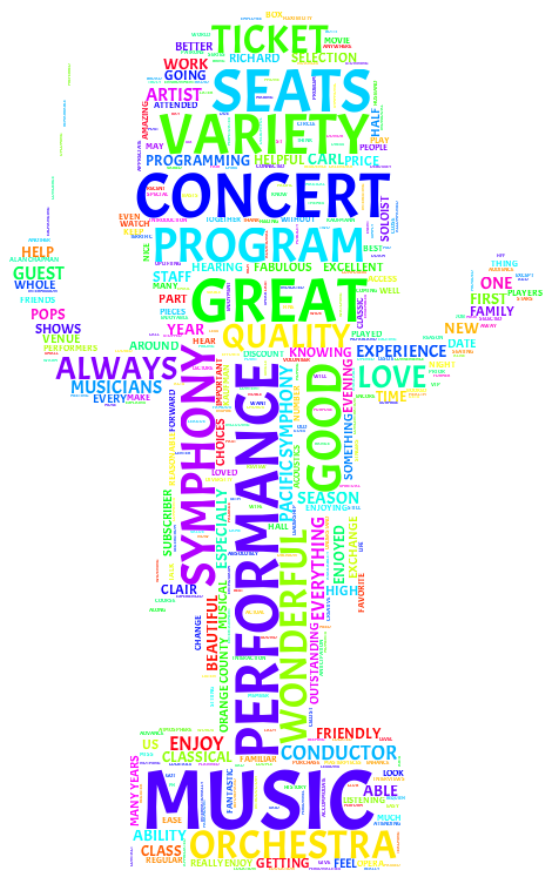

In [183]:
wc_enjoy_most = WordCloud(mask=icon_array, font_path='resources/Acme-Regular.ttf', background_color='white', 
                          max_words=5000, colormap='gist_rainbow').generate(all_enjoy_most)
plt.figure(figsize=[32, 16])
plt.imshow(wc_enjoy_most, interpolation='bilinear')
plt.axis('off')
plt.show()

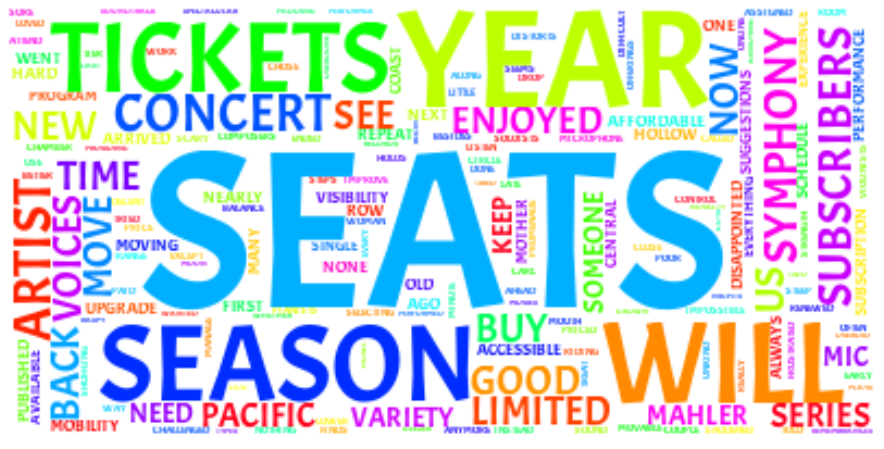

In [190]:
wc_improve = WordCloud(font_path='resources/Acme-Regular.ttf', background_color='white', 
                          max_words=5000, colormap='gist_rainbow').generate(all_improvements_lapsed)
plt.figure(figsize=[16,8])
plt.imshow(wc_improve, interpolation='bilinear')
plt.axis('off')
plt.show()

In [215]:
pd.Series(all_improvements_lapsed.split(" ")).value_counts().head(20)

SEATS          13
YEARS           7
SEASON          5
TICKETS         5
SYMPHONY        4
SUBSCRIBERS     4
ARTISTS         4
CONCERTS        4
WOULD           3
SERIES          3
GOOD            3
LIMITED         3
BUY             3
BACK            3
YEAR            3
COULD           3
VOICES          3
NEW             3
SEE             3
MOVE            3
dtype: int64

In [197]:
all_improvements_lapsed

'KEEP UP THE GOOD WORK WE ARE SADDENED TO NOT ATTEND YOUR PROGRAMS ANYMORE HAVE OTHER SOLOISTS BESIDES PIANISTS AND VIOLINISTS MORE VARIETY IN COMPOSERS EARLY MAHLER INSTEAD OF LATE MAHLER CARL COULD IMPROVE HIS MICROPHONE USE A LITTLE HE HOLDS THE MIC TOO CLOSE TO HIS MOUTH AND IT OFTEN DISTORTS I NOT SURE IF SOMEONE IN THE CONTROL ROOM IS RIDING HIS MIC BUT THEY SHOULD THEY NEED TO LISTEN TO THE CHAMBER SOUND SELECTING AFFORDABLE ACCESSIBLE SEATS FOR MY MOBILITY CHALLENGED MOTHER WAS NEARLY IMPOSSIBLE WE TRIED TO DO THAT IN A LOWER PRICED TIER AND ENDED UP WITH LIMITED VISIBILITY SEATS WHEN I RENEWED OUR SUBSCRIPTION ONLINE I CHOSE THE MOVABLE SEATS ON THE PROMENADE CIRCLE BUT WHEN OUR TICKETS ARRIVED THOSE WERE OUR ASSIGNED SEATS WE WERE FRUSTRATED AND DISAPPOINTED THAT SEEMS LIKE AN UNKIND WAY TO TREAT AN YEAR OLD WOMAN WITH POOR BALANCE AND LIMITED STRENGTH WHO CAN ONLY MANAGE A FEW STEPS AT A TIME AND FINDS SHUFFLING ALONG A ROW OF SEATS OVER A STEEP DROP TO THE NEXT ROW VERY DIF